<a href="https://colab.research.google.com/github/rebeccal-lee/CHL5230-Datathon-5/blob/main/Datathon_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 5 - Team 9
**Team Members:** Rebecca Lee, Yacine Marouf, Konrad Samsel

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import random
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Data Upload Options
user_choice = input("Specify user (Y, K, R): ")

if user_choice == 'Y':
    # Option I: Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv("drive/My Drive/chl 5230/datathon 5/mhealth.csv") #Yacine File path
elif user_choice == 'K':
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv("drive/My Drive/ML Course/Datathon 5/mhealth.csv") #Konrad File Path
elif user_choice == 'R':
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv('/content/drive/My Drive/applied ML/mhealth.csv') # rebecca file path
else:
    print("Invalid choice. Please specify user (Y, K, R) and try again.")


print(data.shape) # Check, Dimensions = 14 columns, 999,999 obs

Specify user (Y, K, R): Y
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(999999, 14)


In [ ]:
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [ ]:
data.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.473954,-9.618162,-0.944714,-0.023928,-0.616830,-0.131466,-3.578801,-5.72591,2.645165,-0.293943,-0.450610,0.283440,1.702181
std,3.751845,4.076683,5.333969,0.495758,0.354135,0.547774,4.770602,5.70559,3.897641,0.528506,0.564118,0.558707,3.250841
min,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,-2.567800,-22.361000,-18.97200,-18.239000,-8.339200,-3.570800,-2.689700,0.000000
25%,0.115100,-10.116000,-2.662400,-0.454550,-0.816140,-0.561890,-5.984100,-9.36790,0.406120,-0.711760,-0.882960,-0.211210,0.000000
50%,1.336800,-9.644800,-0.016372,-0.070501,-0.703560,-0.137520,-2.859700,-7.35990,2.231200,-0.372550,-0.622180,0.325430,0.000000
75%,2.586900,-9.034300,1.371500,0.426720,-0.542210,0.345780,-1.021200,-2.45280,5.201200,0.049020,-0.080082,0.786640,2.000000
max,20.054000,21.161000,25.015000,60.484000,2.011300,2.770100,19.864000,22.19100,25.741000,3.319600,1.556500,2.750000,12.000000


In [ ]:
print(data.isnull().sum())
#we do not have missing data in our dataset

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


In [ ]:
# Checking for data imbalance

# Compute the count of each class in the 'subject' column
counts = data['subject'].value_counts()

# Construct a pie chart with plotly
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Data in "subject"',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Subject',
    ),
    title=dict(
        text='Distribution of Data in "subject"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350,
)

# Display the pie chart
fig.show()

In [ ]:
# Checking for data imbalance

# Compute the count of each class in the 'activity' column
counts = data['Activity'].value_counts()

# Construct a pie chart with plotly
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Data in "Activity"',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.05,
        title='target',
    ),
    title=dict(
        text='Distribution of Data in "Activity"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

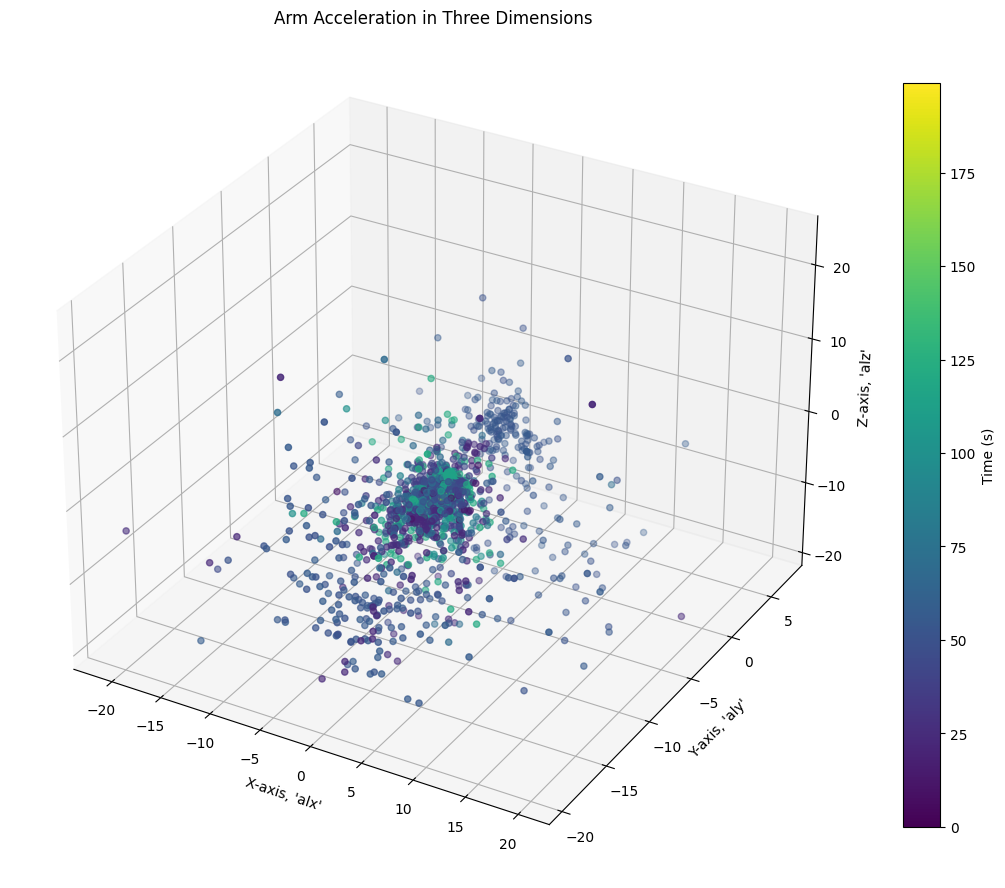

In [ ]:
# alx	aly	alz
x = data['alx'][:10000]
y = data['aly'][:10000]
z = data['alz'][:10000]

# 50 Hz = 50 measurements / s => binning time data points into 1s periods
t = []
num_data = int(len(x)/50)
for i in range(num_data):
  temp = np.ones(50)*i
  t.append(temp)

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(projection='3d')
three = ax.scatter(x,y,z, c=t, cmap='viridis')
ax.set_title("Arm Acceleration in Three Dimensions")
ax.set_xlabel("X-axis, 'alx'")
ax.set_ylabel("Y-axis, 'aly'")
ax.set_zlabel("Z-axis, 'alz'")
cbar = plt.colorbar(three, location='right', fraction=0.04)
cbar.set_label("Time (s)", rotation=90)

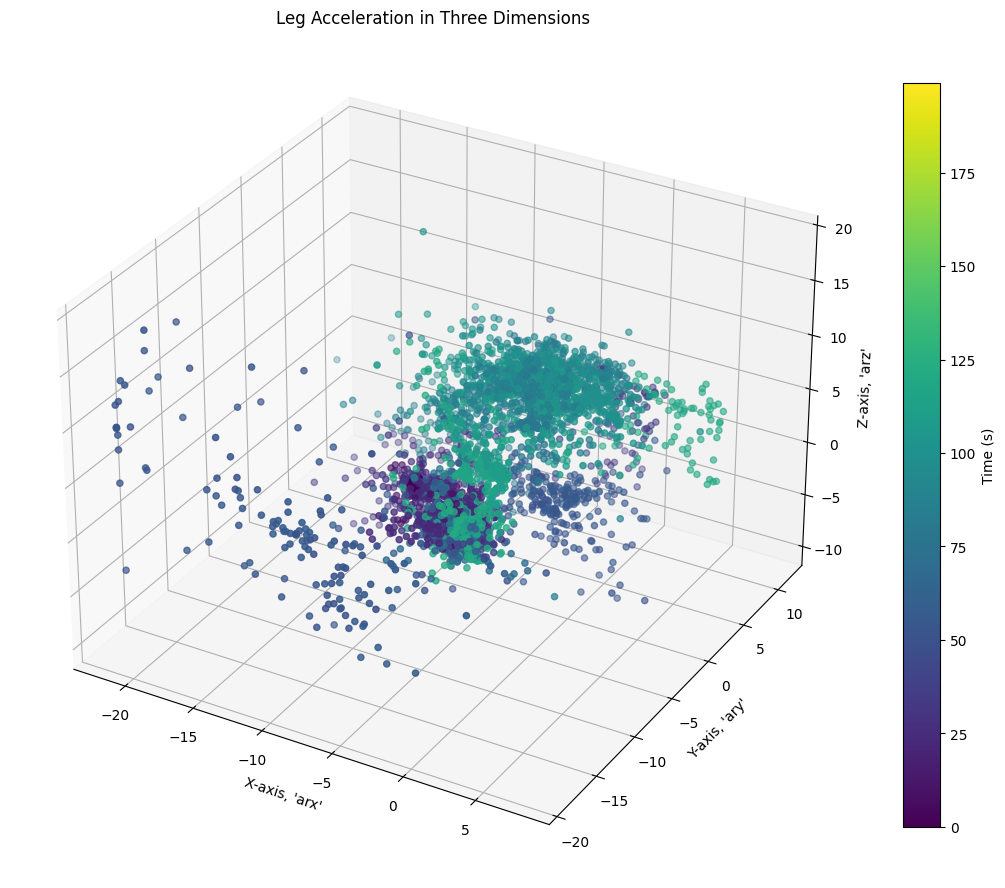

In [ ]:
# alx	aly	alz
x = data['arx'][:10000]
y = data['ary'][:10000]
z = data['arz'][:10000]

# 50 Hz = 50 measurements / s => binning data points into 1s time periods
t = []
num_data = int(len(x)/50)
for i in range(num_data):
  temp = np.ones(50)*i
  t.append(temp)

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(projection='3d')
three = ax.scatter(x,y,z, c=t, cmap='viridis')
ax.set_title("Leg Acceleration in Three Dimensions")
ax.set_xlabel("X-axis, 'arx'")
ax.set_ylabel("Y-axis, 'ary'")
ax.set_zlabel("Z-axis, 'arz'")
cbar = plt.colorbar(three, location='right', fraction=0.04)
cbar.set_label("Time (s)", rotation=90)

In [ ]:
# Grouping Data by Subject and Activity, Counting Instances

data_1 = data.copy()

# Grouping by 'subject' and 'activity' and counting the instances
grouped_data = data_1.groupby(['subject', 'Activity']).size().reset_index(name='instance_count')

pd.set_option('display.max_rows', None) # max out rows

# Displaying the result
print(grouped_data)

pd.reset_option('display.max_rows') #reset max out rows option

      subject  Activity  instance_count
0    subject1         0          126106
1    subject1         1            3072
2    subject1         2            3072
3    subject1         3            3072
4    subject1         4            3072
5    subject1         5            3072
6    subject1         6            3072
7    subject1         7            3072
8    subject1         8            3379
9    subject1         9            3072
10   subject1        10            3072
11   subject1        11            3072
12   subject1        12            1075
13   subject2         0           95029
14   subject2         1            3072
15   subject2         2            3072
16   subject2         3            3072
17   subject2         4            3072
18   subject2         5            3072
19   subject2         6            3174
20   subject2         7            3328
21   subject2         8            3430
22   subject2         9            3072
23   subject2        10            3072


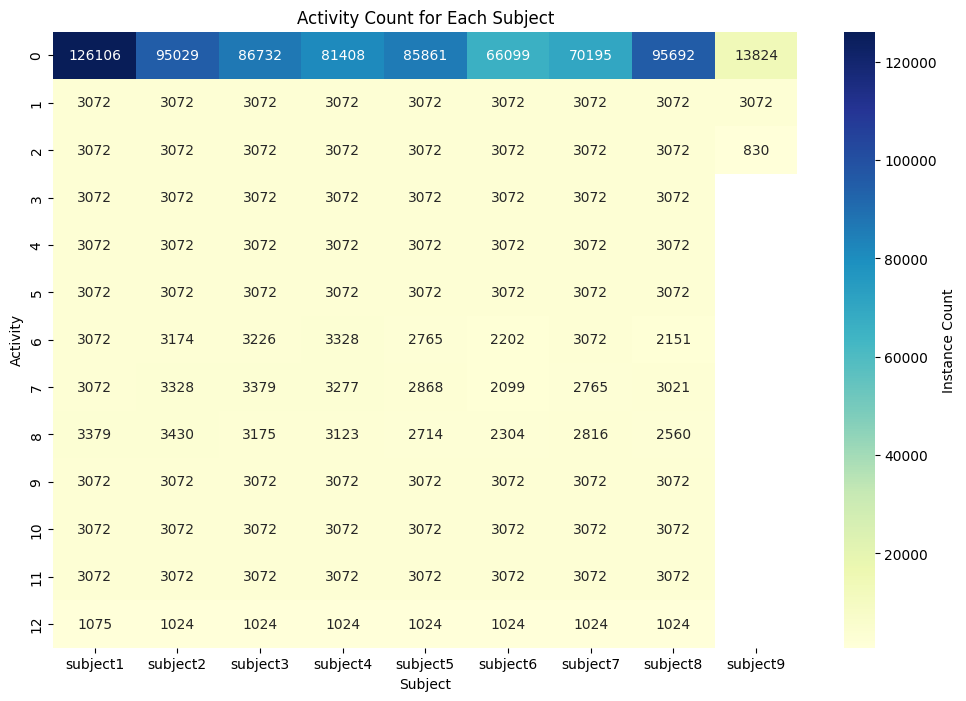

In [ ]:
#Sometimes it can be hard to visualize things, so Im going to plot the data with subject on the x axis and activity on the y axis

# Make matrix
heatmap_data = grouped_data.pivot(index='Activity', columns='subject', values='instance_count')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Instance Count'})
plt.title('Activity Count for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Activity')
plt.show()

In [ ]:
#descr5iptive statistics on the number of instances
print(grouped_data['instance_count'].describe())

count       107.000000
mean       9345.785047
std       23104.795976
min         830.000000
25%        3072.000000
50%        3072.000000
75%        3072.000000
max      126106.000000
Name: instance_count, dtype: float64


 I want to count increments each time there's a change in either 'subject' or 'Activity'

In [ ]:
def add_variable_column(df, subject_col='subject', activity_col='Activity', count_col='variable'):
    # Create a new column 'variable' to store the counts
    df[count_col] = 0  # Initialize the column with 0

    # Initialize variables to store the last values
    last_subject = None
    last_activity = None
    count = 0

    # Loop through the rows of the DataFrame
    for index, row in df.iterrows():
        current_subject = row[subject_col]
        current_activity = row[activity_col]

        # Check if the values are the same as the last row
        if current_subject == last_subject and current_activity == last_activity:
            df.at[index, count_col] = count
        else:
            count += 1
            df.at[index, count_col] = count

        # Update the last values
        last_subject = current_subject
        last_activity = current_activity

    return df


In [ ]:
data_1 = add_variable_column(data_1, subject_col='subject', activity_col='Activity', count_col='instance') #2 min to run on TPU,

In [ ]:
data_1.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,instance
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1,1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1,1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1,1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1,1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1,1


In [ ]:
# Grouping by 'subject', 'activity', and 'instance' and counting the instances
grouped_data_i = data_1.groupby(['subject', 'Activity', 'instance']).size().reset_index(name='instance_count')

# Displaying the result
pd.set_option('display.max_rows', None)  # max out rows
print(grouped_data_i)
pd.reset_option('display.max_rows')  # reset max out rows option

      subject  Activity  instance  instance_count
0    subject1         0         1            6656
1    subject1         0         3            3072
2    subject1         0         5            3072
3    subject1         0         7            6144
4    subject1         0         9            6144
5    subject1         0        11           12288
6    subject1         0        13            5632
7    subject1         0        15           11264
8    subject1         0        17            8909
9    subject1         0        19            7680
10   subject1         0        21           11520
11   subject1         0        23           42701
12   subject1         0        25            1024
13   subject1         1         2            3072
14   subject1         2         4            3072
15   subject1         3         6            3072
16   subject1         4         8            3072
17   subject1         5        24            3072
18   subject1         6        10            3072


In [ ]:
#descr5iptive statistics on the number of instances
print(grouped_data_i['instance_count'].describe())

count      216.000000
mean      4629.625000
std       5653.523683
min        512.000000
25%       2560.000000
50%       3072.000000
75%       4608.000000
max      42701.000000
Name: instance_count, dtype: float64


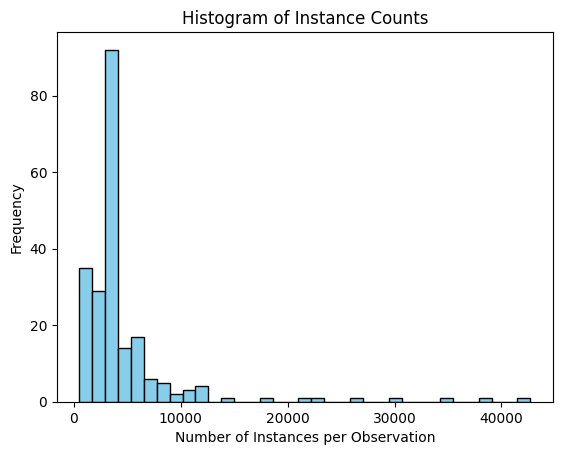

In [ ]:
# Plotting a histogram
plt.hist(grouped_data_i['instance_count'], bins=35, color='skyblue', edgecolor='black')
plt.title('Histogram of Instance Counts')
plt.xlabel('Number of Instances per Observation')
plt.ylabel('Frequency')

plt.show()

# No Activity:
Activities with codes **0 (Doing Nothing), 1 (Standing Still), 2 (Sitting and Relaxing),** and **3 (Lying Down)** are associated with rest and inactivity

# Low Intensity Activity:
Codes **4 (Walking)** and **9 (Cycling)** can be associated with low-intensity activities, involving movement - but not too strenous.

# High Intensity Activity:
Codes **5 (Climbing Stairs), 6 (Waist Bends Forward), 7 (Frontal Elevation of Arms), 8 (Knees Bending - Crouching), 10 (Jogging), 11 (Running), and 12 (Jump Front & Back)** represent high-intensity activities. These activities can be categorized as high intensity


In [ ]:
#create a new variable called activity_3cat, grouped into high and low intensity

# Define the conditions for each intensity category
no_activity_condition = data_1['Activity'].isin([0, 1, 2, 3])
low_intensity_condition = data_1['Activity'].isin([4, 9])
high_intensity_condition = data_1['Activity'].isin([5, 6, 7, 8, 10, 11, 12])

# Use numpy's select function to assign categories based on conditions
data_1['activity_3cat'] = np.select([no_activity_condition, low_intensity_condition, high_intensity_condition],
                                ['No Intensity', 'Low Intensity', 'High Intensity'], default='NA')

data_1.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,instance,activity_3cat
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1,1,No Intensity
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1,1,No Intensity
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1,1,No Intensity
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1,1,No Intensity
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1,1,No Intensity


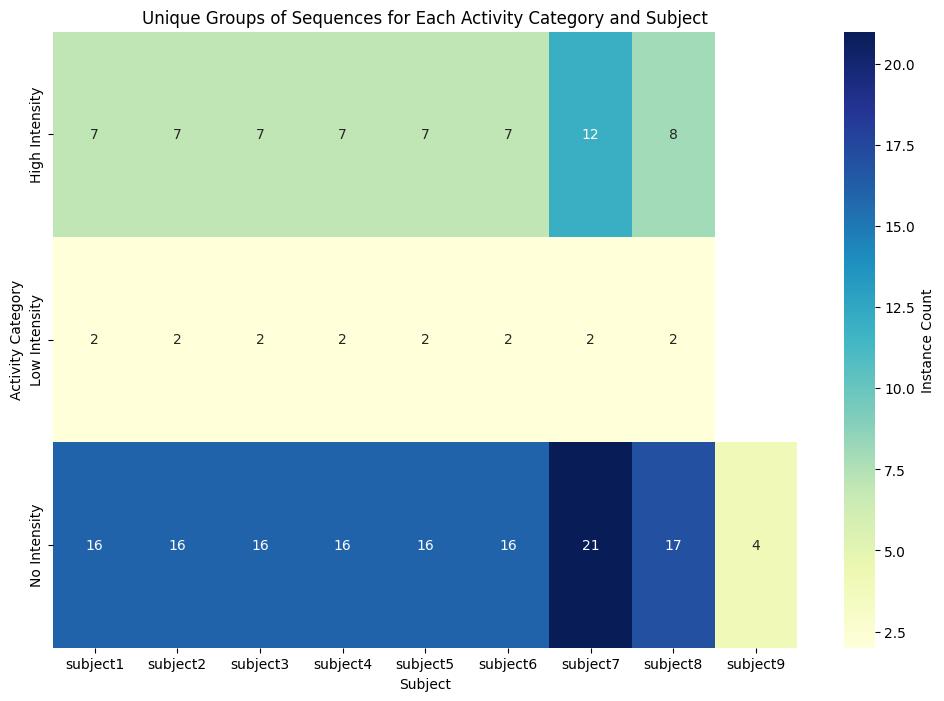

In [ ]:
# Create a DataFrame with the count of unique instances for each activity_3cat and subject
heatmap_data = data_1.groupby(['activity_3cat', 'subject'])['instance'].nunique().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Instance Count'})
plt.title('Unique Groups of Sequences for Each Activity Category and Subject')
plt.xlabel('Subject')
plt.ylabel('Activity Category')
plt.show()

In [ ]:
# Grouping by 'subject', 'activity', and 'instance' and counting the instances
grouped_data_i = data_1.groupby(['subject', 'activity_3cat', 'instance']).size().reset_index(name='instance_count')

# Displaying the result
pd.set_option('display.max_rows', None)  # max out rows
print(grouped_data_i)
pd.reset_option('display.max_rows')  # reset max out rows option

      subject   activity_3cat  instance  instance_count
0    subject1  High Intensity        10            3072
1    subject1  High Intensity        12            3072
2    subject1  High Intensity        14            3379
3    subject1  High Intensity        18            3072
4    subject1  High Intensity        20            3072
5    subject1  High Intensity        22            1075
6    subject1  High Intensity        24            3072
7    subject1   Low Intensity         8            3072
8    subject1   Low Intensity        16            3072
9    subject1    No Intensity         1            6656
10   subject1    No Intensity         2            3072
11   subject1    No Intensity         3            3072
12   subject1    No Intensity         4            3072
13   subject1    No Intensity         5            3072
14   subject1    No Intensity         6            3072
15   subject1    No Intensity         7            6144
16   subject1    No Intensity         9         

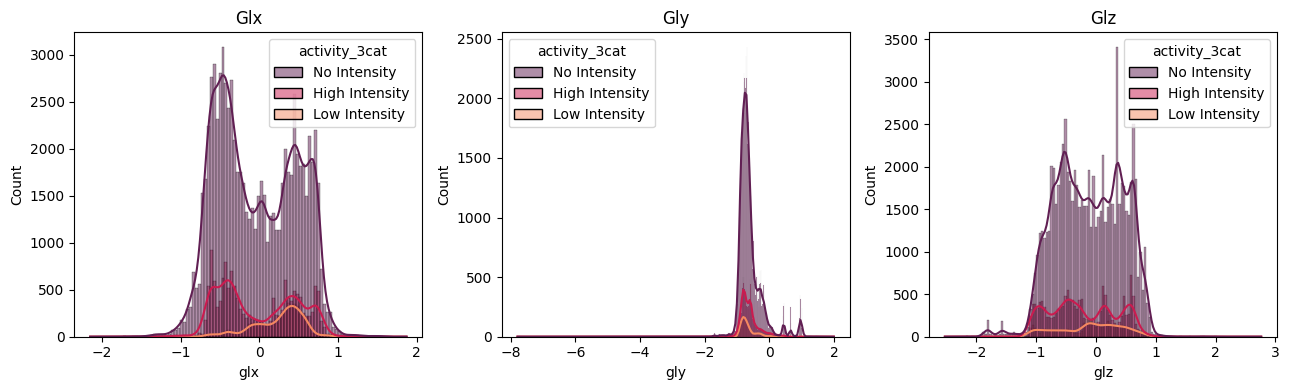

In [ ]:
selected_columns_for_analysis = ['glx', 'gly', 'glz']

# Sample 10% of the data
data_1_sampled = data_1.sample(frac=0.1, random_state=42)

# Create a grid of subplots with 1 row and 3 columns
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(selected_columns_for_analysis):
    # Plot a histogram of the feature split by the 'activity_3cat' class
    sns.histplot(data_1_sampled, x=column, hue='activity_3cat', kde=True, palette='rocket', ax=axs[i],
                 ) #removed multiple='stack'
    axs[i].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

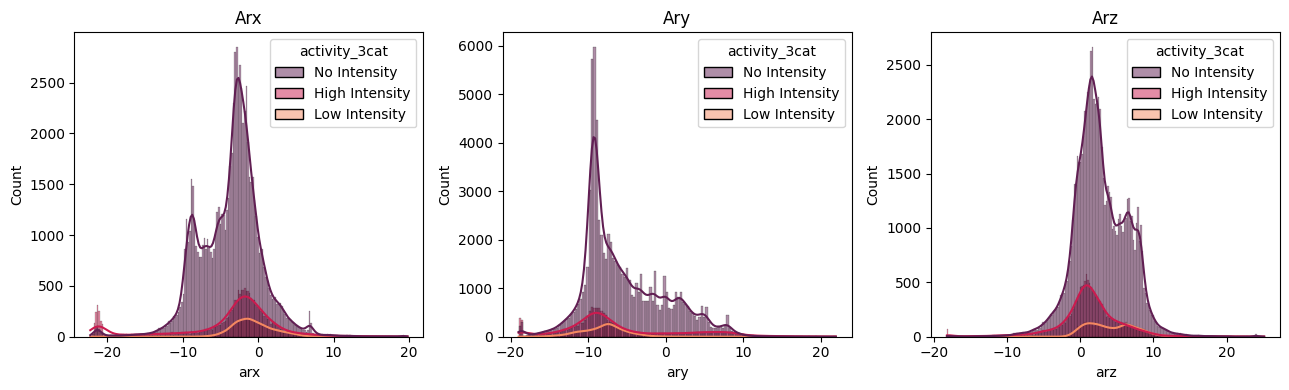

In [ ]:
selected_columns_for_analysis = ['arx', 'ary', 'arz']

# Create a grid of subplots with 1 row and 3 columns
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(selected_columns_for_analysis):
    # Plot a histogram of the feature split by the 'activity_3cat' class
    sns.histplot(data_1_sampled, x=column, hue='activity_3cat', kde=True, palette='rocket', ax=axs[i],
                 ) #removed multiple='stack'
    axs[i].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

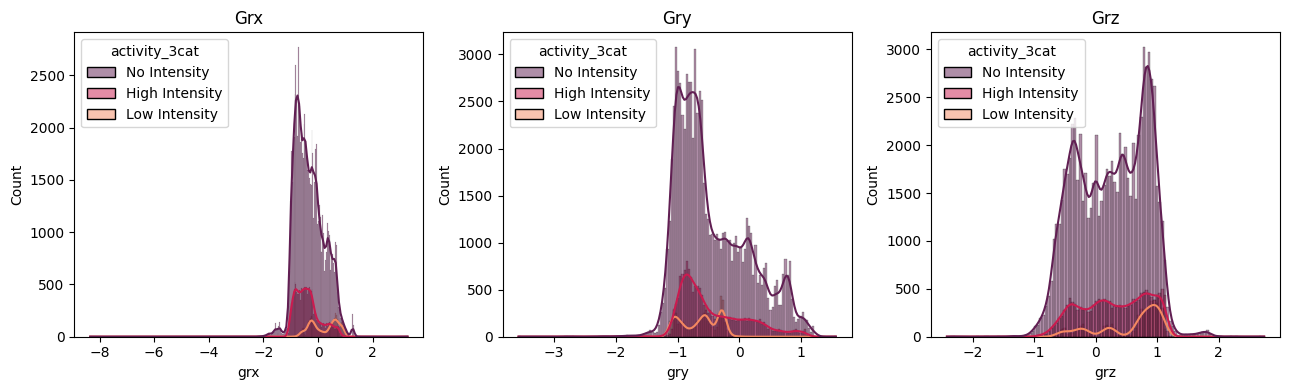

In [ ]:
selected_columns_for_analysis = ['grx', 'gry', 'grz']

# Create a grid of subplots with 1 row and 3 columns
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(selected_columns_for_analysis):
    # Plot a histogram of the feature split by the 'activity_3cat' class
    sns.histplot(data_1_sampled, x=column, hue='activity_3cat', kde=True, palette='rocket', ax=axs[i],
                 ) #removed multiple='stack'
    axs[i].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

In [ ]:
data_1.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,instance,activity_3cat
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1,1,No Intensity
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1,1,No Intensity
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1,1,No Intensity
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1,1,No Intensity
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1,1,No Intensity


In [ ]:
df_encoded = data_1.copy()

In [ ]:
#encode activity_3cat to numerical variable



# Encoding the 'readmitted' column
activity_3cat_mapping = {'No Intensity': 0, 'Low Intensity': 1, 'High Intensity': 2}
df_encoded['activity_3cat'] = df_encoded['activity_3cat'].map(activity_3cat_mapping)

# Verifying the encoding
activity_3cat_counts = df_encoded['activity_3cat'].value_counts()
activity_3cat_counts

0    798576
2    152271
1     49152
Name: activity_3cat, dtype: int64

In [ ]:
#Exclude everyting where subject == subject 9
filtered_data = df_encoded[df_encoded['subject'] != 'subject9']

filtered_data.shape

(982273, 16)

In [ ]:
filtered_data = filtered_data.drop(['Activity'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

grouped = filtered_data.groupby('subject')
grouped_dfs = [group for _, group in grouped]


# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.25, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((753408, 15), (228865, 15))

In [ ]:
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,instance,activity_3cat
0,0.214821,-0.022355,0.309939,0.244241,-0.668159,-1.036175,-1.098917,0.233330,-0.594683,-0.335191,-1.016340,-0.471094,1,0
1,0.267516,0.023418,0.319902,0.207517,-0.662733,-1.028975,-1.094306,0.278958,-0.636633,-0.335191,-1.016340,-0.471094,1,0
2,0.272975,0.009010,0.319384,0.207517,-0.662733,-1.028975,-1.069191,0.286484,-0.572206,-0.335191,-1.016340,-0.471094,1,0
3,0.213911,0.042315,0.294847,0.207517,-0.662733,-1.028975,-1.094388,0.279577,-0.548748,-0.349689,-1.012564,-0.486675,1,0
4,0.275237,0.052309,0.324983,0.207517,-0.662733,-1.028975,-1.109395,0.309677,-0.538585,-0.349689,-1.012564,-0.486675,1,0


In [ ]:
#remove subject ID after splitting
train_df = train_df.drop(['subject'], axis=1)
test_df = test_df.drop(['subject'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns
numerical_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,instance,activity_3cat
0,0.214821,-0.022355,0.309939,0.244241,-0.668159,-1.036175,-1.098917,0.233330,-0.594683,-0.335191,-1.016340,-0.471094,1,0
1,0.267516,0.023418,0.319902,0.207517,-0.662733,-1.028975,-1.094306,0.278958,-0.636633,-0.335191,-1.016340,-0.471094,1,0
2,0.272975,0.009010,0.319384,0.207517,-0.662733,-1.028975,-1.069191,0.286484,-0.572206,-0.335191,-1.016340,-0.471094,1,0
3,0.213911,0.042315,0.294847,0.207517,-0.662733,-1.028975,-1.094388,0.279577,-0.548748,-0.349689,-1.012564,-0.486675,1,0
4,0.275237,0.052309,0.324983,0.207517,-0.662733,-1.028975,-1.109395,0.309677,-0.538585,-0.349689,-1.012564,-0.486675,1,0


In [ ]:
# Checking the class distribution in the 'readmitted' column of the training set
class_distribution = train_df.groupby('instance').apply(lambda x : x.iloc[-1]['activity_3cat']).value_counts()
class_distribution

0.0    102
2.0     48
1.0     12
dtype: int64

In [ ]:
# Grouping the original training data by instance
grouped_by_instance = train_df.groupby('instance')

# Creating separate lists for each class
groups_class_0 = [grouped_by_instance.get_group(instance) for instance in grouped_by_instance.groups if grouped_by_instance.get_group(instance)['activity_3cat'].iloc[-1] == 0]
groups_class_1 = [grouped_by_instance.get_group(instance) for instance in grouped_by_instance.groups if grouped_by_instance.get_group(instance)['activity_3cat'].iloc[-1] == 1]
groups_class_2 = [grouped_by_instance.get_group(instance) for instance in grouped_by_instance.groups if grouped_by_instance.get_group(instance)['activity_3cat'].iloc[-1] == 2]


In [ ]:
groups_class_0[0]

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,instance,activity_3cat
0,0.214821,-0.022355,0.309939,0.244241,-0.668159,-1.036175,-1.098917,0.233330,-0.594683,-0.335191,-1.016340,-0.471094,1,0
1,0.267516,0.023418,0.319902,0.207517,-0.662733,-1.028975,-1.094306,0.278958,-0.636633,-0.335191,-1.016340,-0.471094,1,0
2,0.272975,0.009010,0.319384,0.207517,-0.662733,-1.028975,-1.069191,0.286484,-0.572206,-0.335191,-1.016340,-0.471094,1,0
3,0.213911,0.042315,0.294847,0.207517,-0.662733,-1.028975,-1.094388,0.279577,-0.548748,-0.349689,-1.012564,-0.486675,1,0
4,0.275237,0.052309,0.324983,0.207517,-0.662733,-1.028975,-1.109395,0.309677,-0.538585,-0.349689,-1.012564,-0.486675,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,0.261485,0.020313,0.265032,-0.383603,-0.765635,-0.687072,0.088105,-0.565756,-0.176003,0.389966,-0.875962,-1.168326,1,0
6652,0.274977,0.037512,0.295102,-0.365238,-0.733133,-0.705079,0.091831,-0.555086,-0.164581,0.371837,-0.868571,-1.172230,1,0
6653,0.261745,0.020532,0.282628,-0.365238,-0.733133,-0.705079,0.089896,-0.583297,-0.155995,0.371837,-0.868571,-1.172230,1,0
6654,0.282958,-0.001300,0.266306,-0.365238,-0.733133,-0.705079,0.121846,-0.573034,-0.205824,0.371837,-0.868571,-1.172230,1,0


In [ ]:
len(groups_class_0)

102

In [ ]:
# Importing tqdm for progress bar visualization in loops
from sklearn.utils import resample
from tqdm import tqdm

'''# Oversampling the minority groups (class 1 and class 2)
# Using resample to duplicate records in groups_class_1 to match the number of records in groups_class_0
oversampled_groups_class_1 = resample(groups_class_1, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_2 to match the number in groups_class_0
oversampled_groups_class_2 = resample(groups_class_2, replace=True, n_samples=len(groups_class_0), random_state=42)'''

### Undersampling the majority classes (Class 0 and 2)
oversampled_groups_class_0 = resample(groups_class_0, replace=True, n_samples=len(groups_class_1), random_state=42)
# Similarly, undersampling records in groups_class_2 to match the number in groups_class_0
oversampled_groups_class_2 = resample(groups_class_2, replace=True, n_samples=len(groups_class_1), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
#balanced_groups = oversampled_groups_class_1 + oversampled_groups_class_2 + groups_class_0
balanced_groups = oversampled_groups_class_0 + oversampled_groups_class_2 + groups_class_1

# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'instance'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

36it [00:00, 1036.88it/s]


In [ ]:
# Reassembling the balanced training dataset
train_df_balanced = pd.concat(balanced_groups_copy, ignore_index=True)

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('instance').apply(lambda x : x.iloc[-1]['activity_3cat']).value_counts())

0.0    12
2.0    12
1.0    12
dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'patient_nbr' and create sequences
grouped = train_df_balanced.groupby('instance', sort=False)
sequences = [group.drop(columns=['instance', 'activity_3cat']).values for _, group in grouped]
targets = [group['activity_3cat'].iloc[-1] for _, group in grouped]  # Assuming all records for a patient have the same target

# Calculate the minimum sequence length
min_length = min(len(s) for s in sequences)
print(f"Minimum Sequence Length: {min_length}")
#min_length = 250

# # Truncate sequences based on the minimum length
# truncated_sequences = [s[:min_length] for s in sequences]

# tf.keras.utils.pad_sequences(sequence, maxlen=min_length

truncated_sequences = pad_sequences(sequences, maxlen=min_length, padding='post', dtype='float')

Minimum Sequence Length: 512


In [ ]:
truncated_sequences.shape

(36, 512, 12)

In [ ]:
# Print the first few truncated sequences and their lengths
for i, seq in enumerate(truncated_sequences[:5]):
    print(f"Sequence {i + 1}: {seq}")
    print(f"Length: {len(seq)}\n")

Sequence 1: [[-0.3736723   0.0144189   0.36767959 ... -1.31414927  0.96299516
  -1.00862739]
 [-0.39178227 -0.03608459  0.36168885 ... -1.31414927  0.96299516
  -1.00862739]
 [-0.38096251 -0.01405905  0.39387828 ... -1.31414927  0.96299516
  -1.00862739]
 ...
 [-0.39716875 -0.00704872  0.37840252 ... -1.3177736   0.97776669
  -0.99304791]
 [-0.36745938 -0.0453751   0.38690096 ... -1.3177736   1.01099452
  -0.98916208]
 [-0.36832897 -0.00251262  0.35729427 ... -1.3177736   1.01099452
  -0.98916208]]
Length: 512

Sequence 2: [[ 0.42518518  0.03656573  0.22190622 ... -0.21190841 -0.75040239
   0.74420905]
 [ 0.43048847  0.03899145  0.22399192 ... -0.21190841 -0.75040239
   0.74420905]
 [ 0.41941395  0.04580772  0.19486894 ... -0.21190841 -0.75040239
   0.74420905]
 ...
 [ 0.2489286  -0.45469109 -0.43529682 ... -0.07050397 -0.62854723
   0.7325154 ]
 [ 0.15757674 -0.12600603 -0.45450319 ... -0.00162317 -0.65070272
   0.77925385]
 [ 0.65541059 -0.08292524 -0.10342421 ... -0.00162317 -0.6507

In [ ]:
#Testing sequences

# Group by 'patient_nbr' and create sequences
grouped_test = test_df.groupby('instance', sort=False)
sequences_test = [group.drop(columns=['instance', 'activity_3cat']).values for _, group in grouped_test]
targets_test = [group['activity_3cat'].iloc[-1] for _, group in grouped_test]  # Assuming all records for a patient have the same target

# Truncate sequences for the test set at a fixed length of 512
# truncated_sequences_test = [s[:min_length] for s in sequences_test]
truncated_sequences_test = pad_sequences(sequences_test, maxlen=min_length, padding='post', dtype='float')

In [ ]:
truncated_sequences_test.shape #length (rows), n sequences, n columns

(50, 512, 12)

In [ ]:
# Print the first few truncated sequences and their lengths
for i, seq in enumerate(truncated_sequences_test[:5]):
    print(f"Sequence {i + 1}: {seq}")
    print(f"Length: {len(seq)}\n")

Sequence 1: [[-0.66193837  0.14337018 -0.61801994 ... -1.08572387  0.26139466
   0.26120893]
 [-0.58327543  0.13524402 -0.69006259 ... -1.08209954  0.26508125
   0.28457815]
 [-0.64865414  0.13854299 -0.62006437 ... -1.08209954  0.26508125
   0.28457815]
 ...
 [ 0.24536707 -1.9135191  -1.62881154 ... -0.32069386  0.161677
  -0.46719878]
 [-0.06939911 -0.79696018 -1.27336236 ... -0.26629189  0.07305507
  -0.51004598]
 [-0.1838541  -0.27591552 -1.28139002 ... -0.26629189  0.07305507
  -0.51004598]]
Length: 512

Sequence 2: [[ 0.17650222 -0.13764948 -0.05623355 ...  0.06002747 -0.64331156
  -1.57342884]
 [ 0.06060962 -0.07135456 -0.13658521 ...  0.06002747 -0.64331156
  -1.57342884]
 [ 0.09323529 -0.06575114 -0.07555246 ... -0.13577894 -0.58423627
  -1.58512249]
 ...
 [ 0.21196151  0.06455853 -0.21228533 ... -1.3649454  -0.20757506
  -0.87620179]
 [ 0.09123355  0.07064709 -0.11328998 ... -1.3649454  -0.20757506
  -0.87620179]
 [ 0.17941383  0.1294708  -0.0224536  ... -1.3649454  -0.207575

## RNN - no early stopping

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = truncated_sequences.shape[2]
hidden_size = 100  # Number of hidden units in RNN
num_classes = 3  # For three-class classification
epochs = 100
learning_rate = 0.0001
batch_size = 10
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(truncated_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(truncated_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
predictions_rnn = {}

# To implement early stopping
best_val_loss = float('inf')
patience = 10
trigger_times = 0

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    #optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
    #optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        #l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        #l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        #loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()

            # Saving predicted target/Y values at each epoch in a dictionary
            if epoch not in predictions_rnn:
              predictions_rnn[epoch] = np.array(predicted)
            else:
              predictions_rnn[epoch] = np.concatenate((predictions_rnn[epoch], np.array(predicted)))

        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 62.0%
Epoch 1/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 62.0%
Epoch 2/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 62.0%
Epoch 3/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 62.0%
Epoch 4/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 62.0%
Epoch 5/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 60.0%
Epoch 6/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 62.0%
Epoch 7/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 64.0%
Epoch 8/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 64.0%
Epoch 9/100 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 60.0%
Epoch 10/100 ---> Train Accuracy: 41.666666666666664%, Validation Accuracy: 60.0%
Epoch 11/100 ---> Train Accuracy: 44.44444444444444%, Validation Accuracy: 60.0%
Epoch 12/100 ---> Train Acc

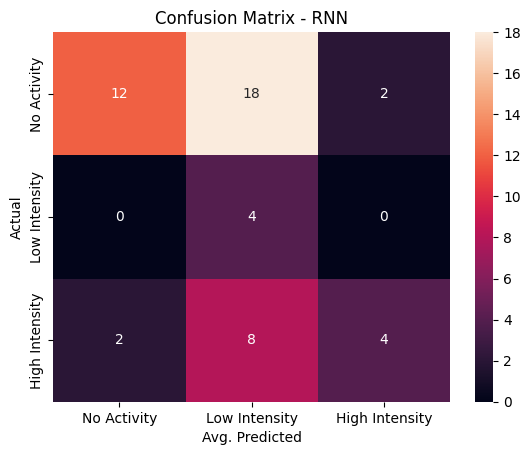

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

rnn_y = targets_test

# Averaging predicted target/Y values
rnn_ypred = np.zeros(len(predictions_rnn[0]))
for i in predictions_rnn.values():
  rnn_ypred += i

rnn_ypred /= len(predictions_rnn)

# Rounding predicted to closest category (e.g. if avg classification = 1.8 -> closest category = 2)
rnn_ypred = np.round(rnn_ypred)

rnn_confusion_matrix = confusion_matrix(rnn_y, rnn_ypred)
sns.heatmap(rnn_confusion_matrix, annot=True)
plt.xticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.yticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.title("Confusion Matrix - RNN")
plt.ylabel('Actual')
plt.xlabel('Avg. Predicted')
plt.show()

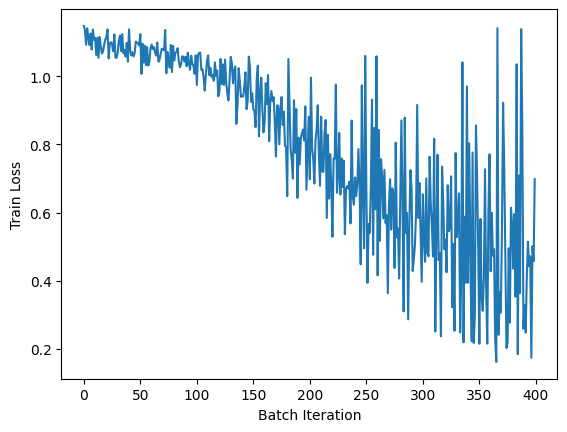

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

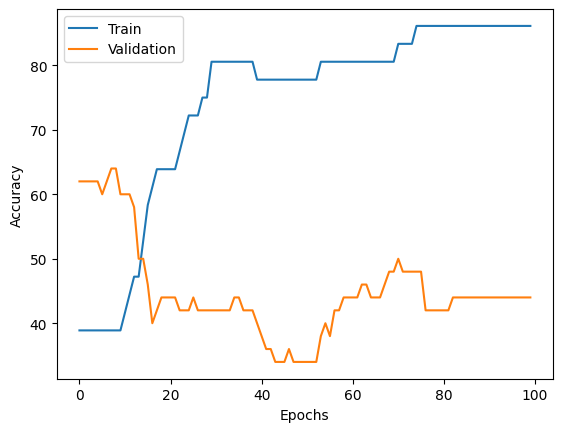

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## RNN - with early stopping

In [ ]:
# Hyperparameters
input_size = truncated_sequences.shape[2]
hidden_size = 100  # Number of hidden units in RNN
num_classes = 3  # For three-class classification
epochs = 1000
learning_rate = 0.0001
batch_size = 10
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(truncated_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(truncated_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
val_loss_list = []
predictions_rnn = {}

# To implement early stopping
best_val_loss = float('inf')
patience = 20
trigger_times = 0

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    #optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    per_epoch_loss_val = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        #l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        #loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()

            # calculating validation loss
            val_loss = loss_fn(out.data, Y)
            per_epoch_loss_val.append(val_loss.item())

            # Saving predicted target/Y values at each epoch in a dictionary
            if epoch not in predictions_rnn:
              predictions_rnn[epoch] = np.array(predicted)
            else:
              predictions_rnn[epoch] = np.concatenate((predictions_rnn[epoch], np.array(predicted)))

        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    avg_val_loss = sum(per_epoch_loss_val) / len(per_epoch_loss_val)
    val_loss_list.append(avg_val_loss)

    # Implementing early stop
    if avg_val_loss < best_val_loss:
      best_val_loss = avg_val_loss
      trigger_times = 0
    else:
      trigger_times += 1

    if trigger_times >= patience:
      print(f'Early stopping at epoch {epoch}')
      break

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/1000 ---> Train Accuracy: 22.22222222222222%, Validation Accuracy: 18.0%
Epoch 1/1000 ---> Train Accuracy: 22.22222222222222%, Validation Accuracy: 18.0%
Epoch 2/1000 ---> Train Accuracy: 22.22222222222222%, Validation Accuracy: 14.0%
Epoch 3/1000 ---> Train Accuracy: 27.77777777777778%, Validation Accuracy: 12.0%
Epoch 4/1000 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 8.0%
Epoch 5/1000 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 12.0%
Epoch 6/1000 ---> Train Accuracy: 38.888888888888886%, Validation Accuracy: 14.0%
Epoch 7/1000 ---> Train Accuracy: 44.44444444444444%, Validation Accuracy: 16.0%
Epoch 8/1000 ---> Train Accuracy: 50.0%, Validation Accuracy: 22.0%
Epoch 9/1000 ---> Train Accuracy: 52.77777777777778%, Validation Accuracy: 24.0%
Epoch 10/1000 ---> Train Accuracy: 55.55555555555556%, Validation Accuracy: 26.0%
Epoch 11/1000 ---> Train Accuracy: 55.55555555555556%, Validation Accuracy: 28.0%
Epoch 12/1000 ---> Train Accuracy: 55

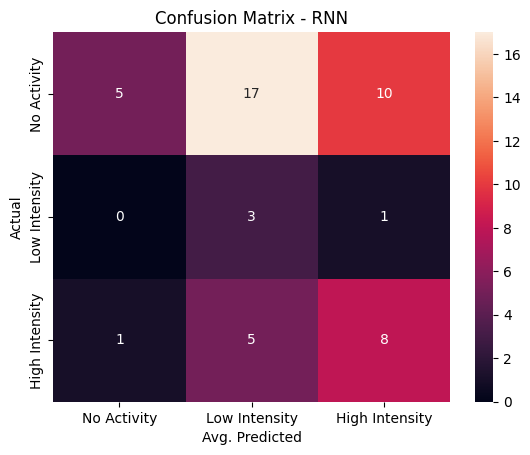

In [ ]:
rnn_y = targets_test

# Averaging predicted target/Y values
rnn_ypred = np.zeros(len(predictions_rnn[0]))
for i in predictions_rnn.values():
  rnn_ypred += i

rnn_ypred /= len(predictions_rnn)

# Rounding predicted to closest category (e.g. if avg classification = 1.8 -> closest category = 2)
rnn_ypred = np.round(rnn_ypred)

rnn_confusion_matrix = confusion_matrix(rnn_y, rnn_ypred)
sns.heatmap(rnn_confusion_matrix, annot=True)
plt.xticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.yticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.title("Confusion Matrix - RNN")
plt.ylabel('Actual')
plt.xlabel('Avg. Predicted')
plt.show()


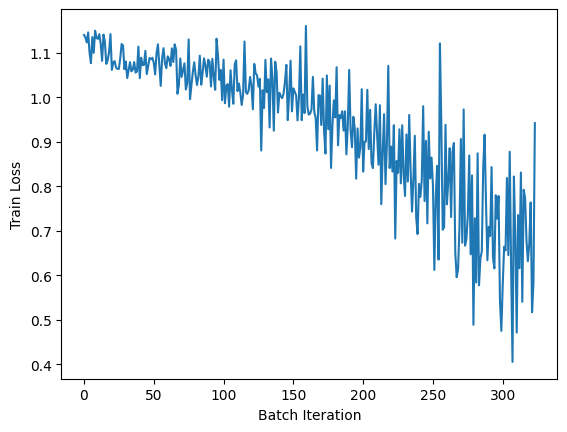

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

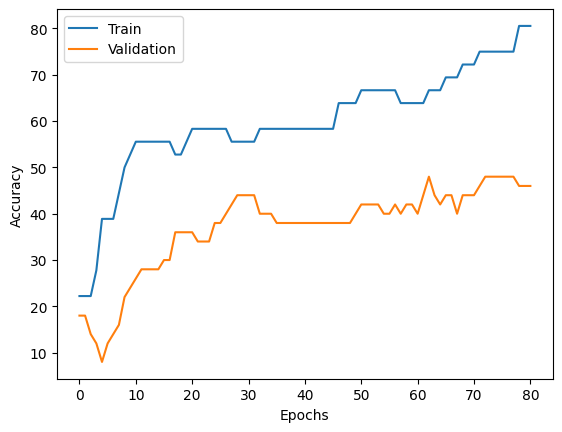

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## LSTM - without early stopping

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = truncated_sequences.shape[2]
hidden_size = 64  # Number of hidden units in RNN
num_classes = 3  # For three-class classification
epochs = 50
learning_rate = 0.001
batch_size = 8
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(truncated_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(truncated_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
#rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
#dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
#optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
predictions_lstm = {}

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        #out, _ = rnn_layer2(out)
        #out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        #l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        #loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    #rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            #out, _ = rnn_layer2(out)
            #out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            #out, _ = rnn_layer2(out)
            #out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)

            # Saving predicted target/Y values at each epoch in a dictionary
            if epoch not in predictions_lstm:
              predictions_lstm[epoch] = np.array(predicted)
            else:
              predictions_lstm[epoch] = np.concatenate((predictions_lstm[epoch], np.array(predicted)))

            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch+1}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    #rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/50 ---> Train Accuracy: 61.111111111111114%, Validation Accuracy: 56.0%
Epoch 1/50 ---> Train Accuracy: 72.22222222222223%, Validation Accuracy: 52.0%
Epoch 2/50 ---> Train Accuracy: 69.44444444444444%, Validation Accuracy: 46.0%
Epoch 3/50 ---> Train Accuracy: 77.77777777777777%, Validation Accuracy: 42.0%
Epoch 4/50 ---> Train Accuracy: 80.55555555555556%, Validation Accuracy: 42.0%
Epoch 5/50 ---> Train Accuracy: 77.77777777777777%, Validation Accuracy: 42.0%
Epoch 6/50 ---> Train Accuracy: 80.55555555555556%, Validation Accuracy: 44.0%
Epoch 7/50 ---> Train Accuracy: 83.33333333333333%, Validation Accuracy: 46.0%
Epoch 8/50 ---> Train Accuracy: 80.55555555555556%, Validation Accuracy: 52.0%
Epoch 9/50 ---> Train Accuracy: 77.77777777777777%, Validation Accuracy: 52.0%
Epoch 10/50 ---> Train Accuracy: 83.33333333333333%, Validation Accuracy: 50.0%
Epoch 11/50 ---> Train Accuracy: 77.77777777777777%, Validation Accuracy: 44.0%
Epoch 12/50 ---> Train Accuracy: 86.1111111111111

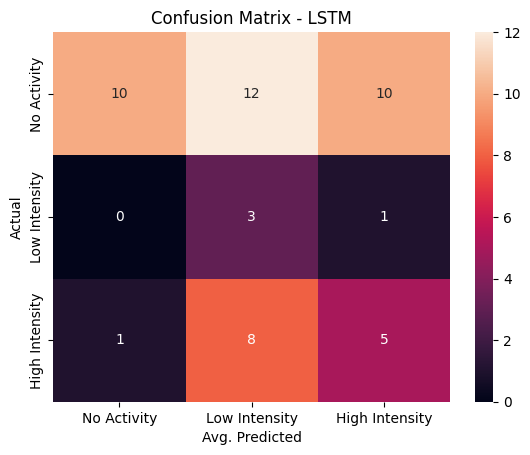

In [ ]:
lstm_y = targets_test

# Averaging predicted target/Y values
lstm_ypred = np.zeros(len(predictions_lstm[0]))
for i in predictions_lstm.values():
  lstm_ypred += i

lstm_ypred /= len(predictions_lstm)

# Rounding predicted to closest category (e.g. if avg classification = 1.8 -> closest category = 2)
lstm_ypred = np.round(lstm_ypred)

lstm_confusion_matrix = confusion_matrix(lstm_y, lstm_ypred)
sns.heatmap(lstm_confusion_matrix, annot=True)
plt.xticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.yticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.title("Confusion Matrix - LSTM")
plt.ylabel('Actual')
plt.xlabel('Avg. Predicted')
plt.show()

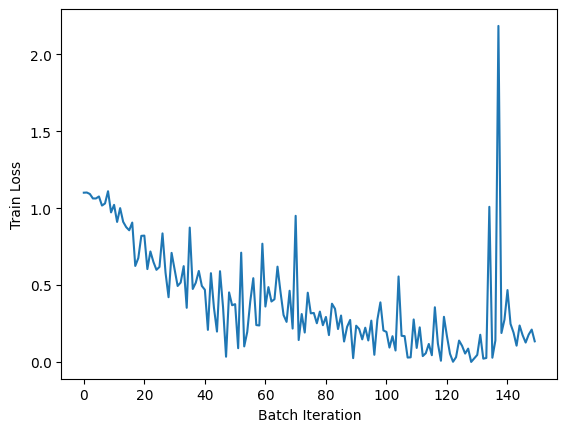

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

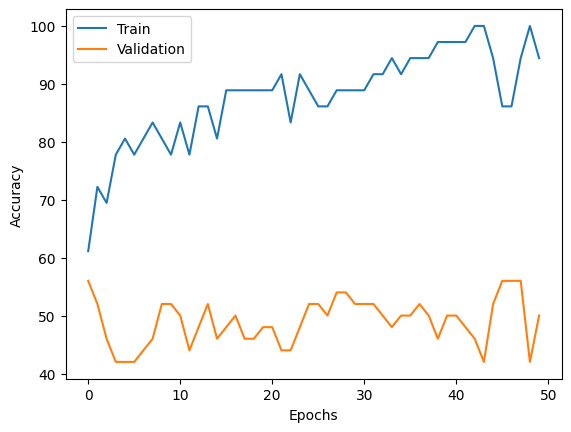

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## LSTM - with early stopping

In [ ]:
# Hyperparameters
input_size = truncated_sequences.shape[2]
hidden_size = 64  # Number of hidden units in RNN
num_classes = 3  # For three-class classification
epochs = 1000
learning_rate = 0.001
batch_size = 8
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(truncated_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(truncated_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
#rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
#dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
#optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
val_loss_list = []
predictions_lstm = {}

# To implement early stopping
best_val_loss = float('inf')
patience = 10
trigger_times = 0

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    per_epoch_loss_val = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        #out, _ = rnn_layer2(out)
        #out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        #l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        #loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    #rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            #out, _ = rnn_layer2(out)
            #out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            #out, _ = rnn_layer2(out)
            #out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)

            # calculating validation loss
            val_loss = loss_fn(out.data, Y)
            per_epoch_loss_val.append(val_loss.item())

            # Saving predicted target/Y values at each epoch in a dictionary
            if epoch not in predictions_lstm:
              predictions_lstm[epoch] = np.array(predicted)
            else:
              predictions_lstm[epoch] = np.concatenate((predictions_lstm[epoch], np.array(predicted)))

            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch+1}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    avg_val_loss = sum(per_epoch_loss_val) / len(per_epoch_loss_val)
    val_loss_list.append(avg_val_loss)

    # Implementing early stop
    if avg_val_loss < best_val_loss:
      best_val_loss = avg_val_loss
      trigger_times = 0
    else:
      trigger_times += 1

    if trigger_times >= patience:
      print(f'Early stopping at epoch {epoch+1}')
      break

    # Set the model back to train mode
    rnn_layer1.train()
    #rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 1/1000 ---> Train Accuracy: 41.666666666666664%, Validation Accuracy: 48.0%
Epoch 2/1000 ---> Train Accuracy: 52.77777777777778%, Validation Accuracy: 46.0%
Epoch 3/1000 ---> Train Accuracy: 61.111111111111114%, Validation Accuracy: 60.0%
Epoch 4/1000 ---> Train Accuracy: 63.888888888888886%, Validation Accuracy: 40.0%
Epoch 5/1000 ---> Train Accuracy: 58.333333333333336%, Validation Accuracy: 48.0%
Epoch 6/1000 ---> Train Accuracy: 69.44444444444444%, Validation Accuracy: 44.0%
Epoch 7/1000 ---> Train Accuracy: 75.0%, Validation Accuracy: 46.0%
Epoch 8/1000 ---> Train Accuracy: 77.77777777777777%, Validation Accuracy: 36.0%
Epoch 9/1000 ---> Train Accuracy: 75.0%, Validation Accuracy: 48.0%
Epoch 10/1000 ---> Train Accuracy: 72.22222222222223%, Validation Accuracy: 46.0%
Epoch 11/1000 ---> Train Accuracy: 75.0%, Validation Accuracy: 42.0%
Epoch 12/1000 ---> Train Accuracy: 69.44444444444444%, Validation Accuracy: 44.0%
Epoch 13/1000 ---> Train Accuracy: 80.55555555555556%, Valid

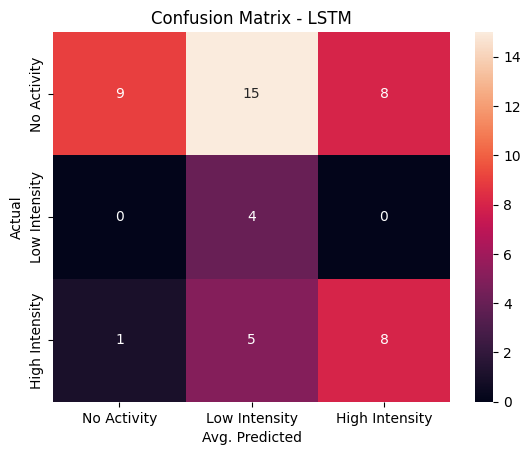

In [ ]:
lstm_y = targets_test

# Averaging predicted target/Y values
lstm_ypred = np.zeros(len(predictions_lstm[0]))
for i in predictions_lstm.values():
  lstm_ypred += i

lstm_ypred /= len(predictions_lstm)

# Rounding predicted to closest category (e.g. if avg classification = 1.8 -> closest category = 2)
lstm_ypred = np.round(lstm_ypred)

lstm_confusion_matrix = confusion_matrix(lstm_y, lstm_ypred)
sns.heatmap(lstm_confusion_matrix, annot=True)
plt.xticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.yticks([0.5,1.5,2.5], labels=['No Activity', 'Low Intensity', 'High Intensity'])
plt.title("Confusion Matrix - LSTM")
plt.ylabel('Actual')
plt.xlabel('Avg. Predicted')
plt.show()

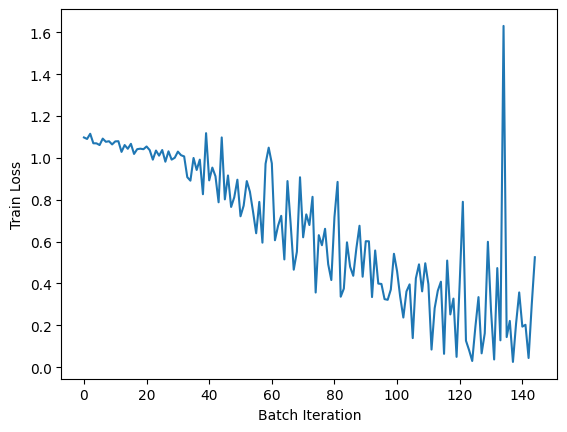

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

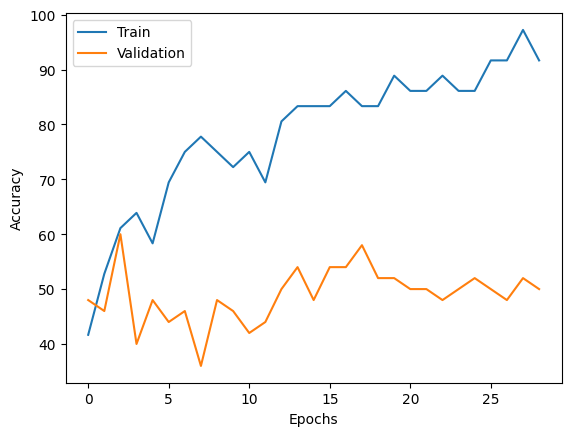

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()